<a href="https://colab.research.google.com/github/tensorflow-project/FineTuning/blob/main/four_emotions/image_generation_four_emotions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
get_ipython().system('pip install -q git+https://github.com/keras-team/keras-cv.git')
get_ipython().system('pip install -q tensorflow==2.11.0')
get_ipython().system('pip install pyyaml h5py')

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 103.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 KB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 81.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 86.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!git clone https://github.com/tensorflow-project/FineTuning

Cloning into 'FineTuning'...
remote: Enumerating objects: 2193, done.
remote: Counting objects: 100% (2193/2193), done.
remote: Compressing objects: 100% (661/661), done.
remote: Total 2193 (delta 1595), reused 2071 (delta 1505), pack-reused 0
Receiving objects: 100% (2193/2193), 228.45 MiB | 16.89 MiB/s, done.
Resolving deltas: 100% (1595/1595), done.


In [ ]:
import sys
import os
import numpy as np
from google.colab import drive
import urllib.request


py_file_location = "/content/FineTuning/four_emotions"
sys.path.append(os.path.abspath(py_file_location))
py_file_location = "/content/FineTuning/models"
sys.path.append(os.path.abspath(py_file_location))

import textual_inversion_four_emotions as txt

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
### load stable diffusion class and placeholder token from textual_inversion.py
stable_diffusion = txt.StableDiffusion()
placeholder_token = "<my-broccoli-token>"
txt.adding_token(stable_diffusion, placeholder_token)

By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE
492466864/492466864 [==============================] - 6s 0us/step


In [ ]:
### for downloading weights from dropbox:
### if you want to use any other service than dropbox, change the code underneath
### Replace  and  with the ID and name of your file

### The file id is the string of characters between "s/" and the next slash "/"
### example: https://www.dropbox.com/s/d9g9o74p19bsl76/LR5weightsAllEmotions40epochs.npy?dl=0
file_id = 'd9g9o74p19bsl76'

### name óf file
file_name = 'LR5weightsAllEmotions40epochs.npy'

url = f'https://www.dropbox.com/s/{file_id}/{file_name}?dl=1'
filename = f'{file_name}.npy'
     


In [ ]:
### Download the file from the URL and save it locally
urllib.request.urlretrieve(url, filename=filename)

### Load the saved numpy file using numpy.load()
weights = np.load(filename, allow_pickle=True)

### Set the weights of the text encoder
stable_diffusion.text_encoder.set_weights(weights)

In [ ]:
### insert your prompt here
prompt = f"a {placeholder_token} in love ."

### choose how many images should be generated
number = 3

### choose a seed, use None for random genration
SEED = None

### if you want you can modify the number of timesteps for generating your Images
number_steps = 30

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


198180272/198180272 [==============================] - 2s 0us/step


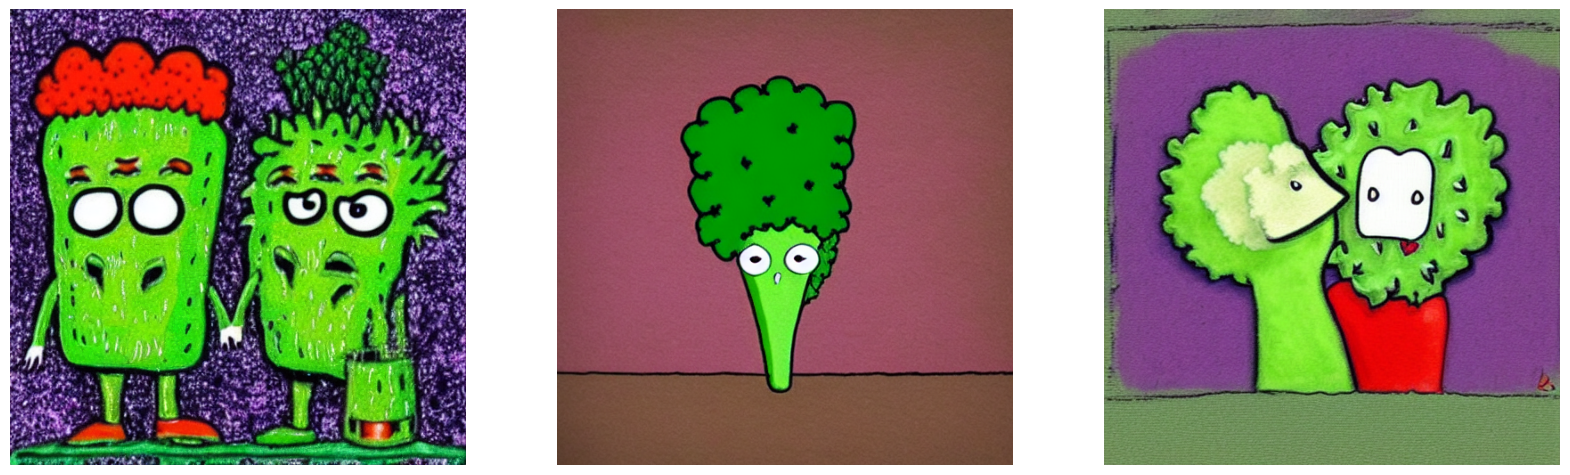

In [ ]:
### generate images and plot them here
generated = stable_diffusion.text_to_image(
    prompt , batch_size=number, num_steps=number_steps, seed=SEED
)
txt.plot_images(generated)

In [ ]:
### if you want to generate images and save them directly to your google drive, you can do that with the following code! 
### However, you need to make sure to create a folder called "Images" in your Google Drive first. 
### Please confirm, that you created that folder with folder_created = True in the following line, so we can be sure the code runs as intended

folder_created = False

if folder_created == True:

    ### agree to mounting your Google Drive
    drive.mount("/content/drive")

    drive_folder = '/content/drive/MyDrive/Images/'

    txt.image_generation(prompt, drive_folder, number, stable_diffusion, seed=SEED, number_steps = number_steps)